# Memphis restaurant hunt. 


## Introduction
### 1.1 Background
Memphis is a city on the Mississippi River in southwest Tennessee, famous for the influential strains of blues, soul and rock 'n' roll that originated there. Elvis Presley, B.B. King and Johnny Cash recorded albums at the legendary Sun Studio, and Presley’s Graceland mansion is a popular attraction. The city itself has a population of 646,889. Memphis played a prominent role in the American civil rights movement and was the site of Martin Luther King Jr.'s 1968 assassination. Memphis is a regional center for commerce, education, media, art, and entertainment. There are many restaurants in Memphis, each belonging to different categories like Chinese, Italian , French etc.  As part of this project, we will list and visualize all major restaurants of Memphis.

### 1.2 Business Problem
How can entrepreneurs better understand city demographics and competative landscape, before opening a new restaurant?
To solve this business problem, we are going to cluster Memphis neighborhoods in order to recommend where entrepreneurs can open new venues. We will recommend arrears and highlight neighborhoods restaurants.
To explore and target recommended locations we will access data through FourSquare API interface and arrange them as a DataFrame for visualization.
Questions that can be asked using the above mentioned datasets
What area has the highest number of restaurants in Memphis? 
Which areas have fewer restaurants? 
Which areas have higher populations? 
What is the best location in Memphis for American restaurant?

## Data sources 
To explore and target recommended locations in Memphis restaurants we will access data through FourSquare API interface and arrange them as a DataFrame for visualization.\
For this project we need the following data:\
Data source: Fousquare API : https://developer.foursquare.com/ \
Description: Memphis restaurants data that contains list Locality, restaurant name, rating along with their latitude and longitude.\
Data source: https://www.zip-codes.com/city/tn-memphis.asp#demographics \
Description: From this source I will receive information about demographics for nearby restaurants in each locality.

In [50]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#### Download, scrape, convert into Dataframe and clean the data.
As it happens in real life cases data stored in different resources, so I for the purpose of this assignment I will use three different information source and collect the data in different ways.\
From www.zip-codes.com I will collect Memphis Zip-codes and population. In the scraped table not all data will be used in the future work.\
I had to drop columns with irrelevant information like: Country, Area code and Type.\
As scraped information was converted in Data Frame as objects we need to delete "," from the column Populations and convert objects in Integers, so we can make calculations later.\


In [26]:
List_url = "https://www.zip-codes.com/city/tn-memphis.asp#demographics"
source = requests.get(List_url).text

soup = BeautifulSoup(source, 'html.parser')
memphis_data = pd.DataFrame(columns=["Zipcode", "Type", "Country", "Population", "Area Code"])
table  = soup.find('table', { "class" : "statTable"})
#print(table)
for row in table.find_all("tr"):
    col = row.find_all("td")
    #print(col)
    Zipcode =col[0].text.strip("ZIP Code")
    Type =col[1].text
    Country =col[2].text
    Population =col[3].text
    AreaCode =col[4].text
    
    
    memphis_data = memphis_data.append({"Zipcode":Zipcode, "Type":Type, "Country":Country, "Population":Population, "Area Code":AreaCode}, ignore_index=True)
memphis_data=memphis_data[memphis_data['Type']!='Type']
M_data = memphis_data.drop(columns=['Type', 'Country', 'Area Code'])
M_data = M_data.replace(',', '', regex=True)
M_data = M_data.astype(int)
M_data = M_data[M_data['Population'] !=0]
M_data = M_data.sort_values('Population',ascending=False)
M_data.head(n=30)

,Zipcode,Population
10,38109,46594
25,38127,45248
26,38128,44863
31,38134,41948
11,38111,41742
18,38118,41465
16,38116,40404
15,38115,39129
23,38125,36150
32,38135,30657


[]

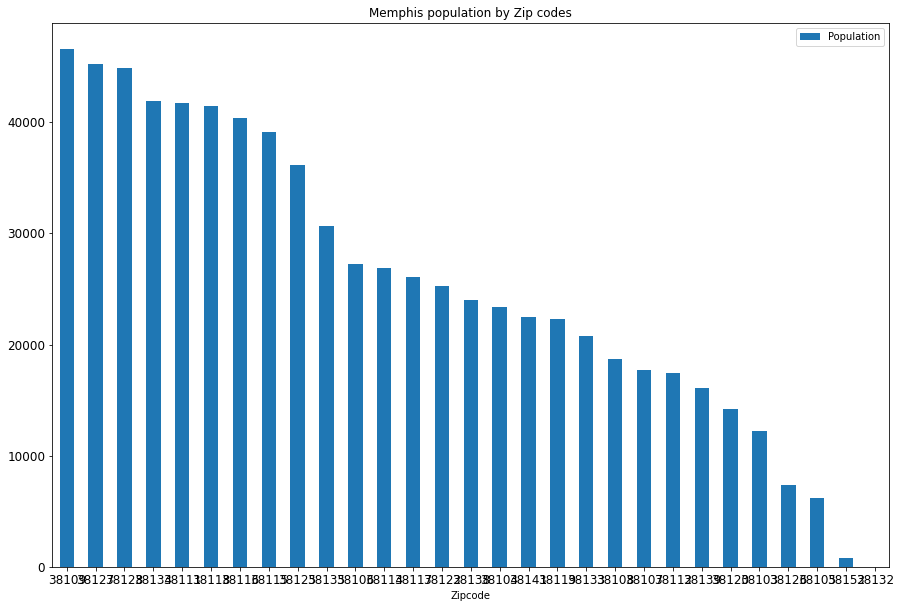

In [23]:
M_data.plot.bar(x='Zipcode', rot=0, title='Memphis population by Zip codes', figsize=(15,10), fontsize=12).plot()

### From www.zipatlas.com I will collect information about average household income for different zipcods.
Same as in the previous case I will keep simple DataFrame with Zipcode and Income only and drop the rest of the columns.

In [24]:
df=pd.read_html("http://zipatlas.com/us/tn/memphis/zip-code-comparison/median-household-income.html", header =0, flavor = 'bs4')
df[11]

memphis_income = df[11].drop(columns=['#', 'City', 'National Rank', 'Location', 'Population'])
memphis_income.rename(columns={'Zip Code':'Zipcode'},inplace=True)
memphis_income['Avg. Income/H/hold'] = memphis_income['Avg. Income/H/hold'].str.replace(',', '', regex=True)
memphis_income['Avg. Income/H/hold'] = memphis_income['Avg. Income/H/hold'].str.replace('$', '', regex=True)
memphis_income['Avg. Income/H/hold'] = memphis_income['Avg. Income/H/hold'].str.replace('.00', '', regex=True)
memphis_income = memphis_income.astype(int)
memphis_income = memphis_income.sort_values('Avg. Income/H/hold',ascending=False)
memphis_income.head(n=30)

,Zipcode,Avg. Income/H/hold
0,38125,67831
1,38120,65874
2,38135,62403
3,38133,58274
4,38119,56925
5,38141,52333
6,38117,47676
7,38134,47341
9,38103,39255
10,38115,38449


[]

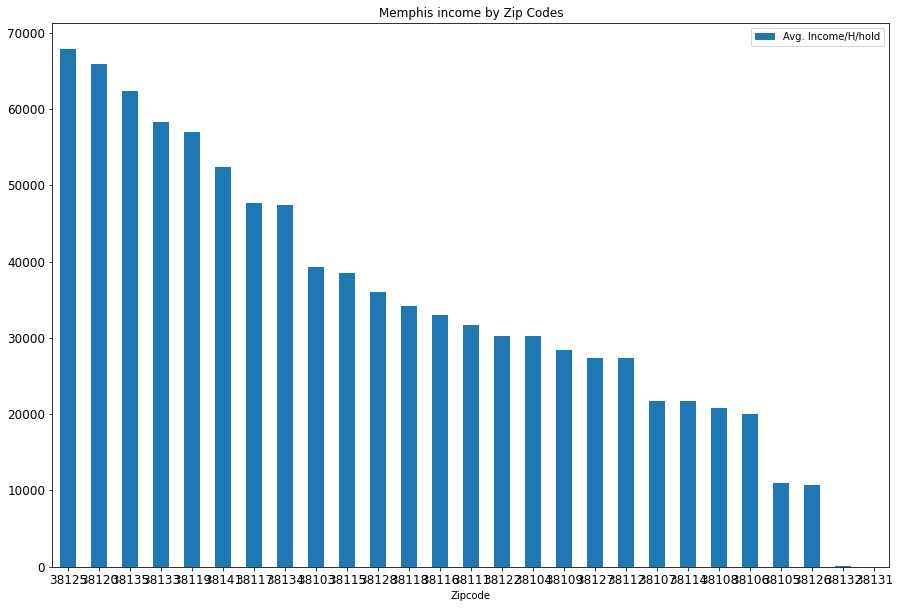

In [25]:
memphis_income.plot.bar(x='Zipcode', rot=0, title='Memphis income by Zip Codes', figsize=(15,10), fontsize=12).plot()

### Now I will get the latitude and the longitude coordinates of each neighborhoods.

In [27]:
ZIP = pd.read_csv('https://sites.google.com/site/breathe42/zip_to_lat_lon_North%20America.csv', sep=',')
ZIP.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country code,postal code,place,state,statecode,province_or_county,province_or_countycode,community,communitycode,latitude,longitude,accuracy,Country,Continent
0,BM,DV 01,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
1,BM,DV 02,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
2,BM,DV 03,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
3,BM,DV 04,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America
4,BM,DV 05,Devonshire,Devonshire Parish,1,NaN,NaN,NaN,NaN,32.3028,-64.7558,NaN,Bermuda,North America


### And Now I will merge 3 different DataFrames into single DataFrame.
It will be a two steps process. Where I will firstly combine Geo data with Population.

In [28]:
ZIP1 = ZIP.drop(columns=['country code', 'statecode', 'province_or_county', 'province_or_countycode', 'community', 'Country', 'Continent', 'accuracy'])
ZIP1.rename(columns={'postal code':'Zipcode', 'latitude':'Latitude', 'longitude':'Longitude'},inplace=True)
geo_merged = pd.merge(ZIP1, M_data, on='Zipcode')
geo_data = geo_merged[['Zipcode','Population','Latitude','Longitude']]

geo_data.head()


,Zipcode,Population,Latitude,Longitude
0,38103,12180,35.1440,-90.0480
1,38104,23409,35.1334,-90.0046
2,38105,6184,35.1497,-90.0330
3,38106,27222,35.1021,-90.0330
4,38107,17698,35.1831,-90.0201


### On the second step we will add Average income information to the DataFrame.

In [78]:
merged = pd.merge(geo_merged, memphis_income, on='Zipcode')
data = merged[['Zipcode','Population','Latitude','Longitude', 'Avg. Income/H/hold']]
data = data.sort_values('Avg. Income/H/hold',ascending=False)

data.head()

,Zipcode,Population,Latitude,Longitude,Avg. Income/H/hold
17,38125,36150,35.0312,-89.8124,67831
15,38120,14237,35.1207,-89.8651,65874
24,38135,30657,35.2323,-89.8509,62403
22,38133,20787,35.2054,-89.8036,58274
14,38119,22330,35.0821,-89.8501,56925
25,38141,22462,35.0231,-89.8492,52333
12,38117,26125,35.1124,-89.9034,47676
23,38134,41948,35.1845,-89.8574,47341
0,38103,12180,35.1440,-90.0480,39255
10,38115,39129,35.0579,-89.8640,38449




## Now when we have initial information about Memphis demographics we can explore city Venues.


In [30]:
import numpy as np
import os
from sklearn.cluster import KMeans
!pip install folium
import folium 
from geopy.geocoders import Nominatim 




/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [31]:
CLIENT_ID = 'G1IRT315WKKXPWVBY50H0KTZ0IVLULFI1HGRKRK4OXN55CWB' # your Foursquare ID
CLIENT_SECRET = 'I3QMFSSLQF5OGVHSVASJ5VXMDIK1IPVETVIMBNUZMR0RJVOT' # your Foursquare Secret
VERSION = '20180604'

### I will create a list and dataframe with the only food venues in the Memphis.
To do that I will select categoryId that is related to food at the Foursquare venue categories and add it into my code.

In [32]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    categoryId="4d4b7105d754a06374d81259"
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION,
            categoryId,
            lat, 
            lng, 
            radius, 
            LIMIT)

        
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zipcode', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
Memphis_venues = getNearbyVenues(names=geo_data['Zipcode'],
                                   latitudes=geo_data['Latitude'],
                                   longitudes=geo_data['Longitude']
                                  )


38103
38104
38105
38106
38107
38108
38109
38111
38112
38114
38115
38116
38117
38118
38119
38120
38122
38125
38126
38127
38128
38132
38133
38134
38135
38138
38139
38141
38152


### We can check what kind of venue categories are in the dataframe.

In [39]:
Memphis_venues['Venue Category'].unique()

array(['BBQ Joint', 'Cuban Restaurant', 'Mexican Restaurant',
       'French Restaurant', 'Seafood Restaurant', 'Tapas Restaurant',
       'American Restaurant', 'Burger Joint', 'New American Restaurant',
       'Southern / Soul Food Restaurant', 'Breakfast Spot', 'Steakhouse',
       'Food', 'Fast Food Restaurant', 'Bakery', 'Donut Shop',
       'Japanese Restaurant', 'Wings Joint', 'Pizza Place',
       'Asian Restaurant', 'Fried Chicken Joint', 'Food Truck', 'Café',
       'Ethiopian Restaurant', 'Restaurant', 'Sushi Restaurant',
       'Chinese Restaurant', 'Sandwich Place', 'Deli / Bodega',
       'Salad Place', 'Italian Restaurant', 'Mediterranean Restaurant',
       'Tex-Mex Restaurant', 'Korean Restaurant', 'Indian Restaurant'],
      dtype=object)

No of different types of venues in Memphis : Zipcode             20
Latitude            20
Longitude           20
Venue              106
Venue Latitude     116
Venue Longitude    116
Venue Category      35
dtype: int64


In [41]:
Memphis_venues.head()

,Zipcode,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,38103,35.144,-90.048,Charles Vergos' Rendezvous,35.143353,-90.051768,BBQ Joint
1,38103,35.144,-90.048,Havana's Pilón,35.144764,-90.051266,Cuban Restaurant
2,38103,35.144,-90.048,Maciel's Tortas & Tacos,35.144000,-90.053038,Mexican Restaurant
3,38103,35.144,-90.048,Chez Philippe,35.142480,-90.051420,French Restaurant
4,38103,35.144,-90.048,Flying Fish,35.142064,-90.052735,Seafood Restaurant


### Now I can count them.

In [42]:
Memphis_venues.groupby('Zipcode').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zipcode,,,,,,
38103,24,24,24,24,24,24
38104,12,12,12,12,12,12
38105,3,3,3,3,3,3
38108,1,1,1,1,1,1
38109,1,1,1,1,1,1
38111,8,8,8,8,8,8
38112,8,8,8,8,8,8
38114,1,1,1,1,1,1
38115,4,4,4,4,4,4


In [31]:
Memphis_venues.count()

Zipcode            116
Latitude           116
Longitude          116
Venue              116
Venue Latitude     116
Venue Longitude    116
Venue Category     116
dtype: int64

### and now I group them and identify the most common venue

In [44]:
Memphis_onehot = pd.get_dummies(Memphis_venues[['Venue Category']], prefix="", prefix_sep="")

Memphis_onehot.insert(loc=0, column='Zipcode', value=Memphis_venues['Zipcode'] )
Memphis_grouped = Memphis_onehot.groupby('Zipcode').mean().reset_index()
Memphis_grouped.head()

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zipcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Zipcode'] = Memphis_grouped['Zipcode']

for ind in np.arange(Memphis_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Memphis_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,38103,American Restaurant,BBQ Joint,Mexican Restaurant,Bakery,Burger Joint,Southern / Soul Food Restaurant,Seafood Restaurant,Steakhouse,Breakfast Spot,Food
1,38104,Burger Joint,Donut Shop,Wings Joint,Fast Food Restaurant,Japanese Restaurant,Pizza Place,Food Truck,Fried Chicken Joint,Seafood Restaurant,Asian Restaurant
2,38105,American Restaurant,Fast Food Restaurant,Café,Cuban Restaurant,Food Truck,Food,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant
3,38108,Steakhouse,Wings Joint,Cuban Restaurant,Food Truck,Food,Fast Food Restaurant,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant
4,38109,Fast Food Restaurant,Wings Joint,Cuban Restaurant,Food Truck,Food,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant,Fried Chicken Joint


### Now I will disstribute venues in different Clusters for Neighborhoods

In [61]:
# set number of clusters
kclusters = 6

Memphis_grouped_clustering = Memphis_grouped.drop('Zipcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Memphis_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 5, 0, 1, 1, 3, 1, 2], dtype=int32)

### I will add clusters in dataframe

In [62]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Memphis_merged = data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Memphis_merged = Memphis_merged.join(neighborhoods_venues_sorted.set_index('Zipcode'), on='Zipcode')

Memphis_merged.head()

ValueError: cannot insert Cluster Labels, already exists

#### and sort them

In [90]:
neighborhoods_venues_sorted.head(n=50)

,Cluster Labels,Zipcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,38103,American Restaurant,BBQ Joint,Mexican Restaurant,Bakery,Burger Joint,Southern / Soul Food Restaurant,Seafood Restaurant,Steakhouse,Breakfast Spot,Food
1,2,38104,Burger Joint,Donut Shop,Wings Joint,Fast Food Restaurant,Japanese Restaurant,Pizza Place,Food Truck,Fried Chicken Joint,Seafood Restaurant,Asian Restaurant
2,2,38105,American Restaurant,Fast Food Restaurant,Café,Cuban Restaurant,Food Truck,Food,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant
3,2,38108,Steakhouse,Wings Joint,Cuban Restaurant,Food Truck,Food,Fast Food Restaurant,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant
4,1,38109,Fast Food Restaurant,Wings Joint,Cuban Restaurant,Food Truck,Food,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant,Fried Chicken Joint
5,2,38111,Seafood Restaurant,Fried Chicken Joint,Asian Restaurant,Fast Food Restaurant,Burger Joint,Ethiopian Restaurant,Wings Joint,Deli / Bodega,Food Truck,Food
6,2,38112,Restaurant,Food,Bakery,Breakfast Spot,Café,Pizza Place,New American Restaurant,Cuban Restaurant,Fast Food Restaurant,Ethiopian Restaurant
7,2,38114,Southern / Soul Food Restaurant,Wings Joint,Cuban Restaurant,Food Truck,Food,Fast Food Restaurant,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant
8,2,38115,American Restaurant,Cuban Restaurant,Food,Seafood Restaurant,Food Truck,Fast Food Restaurant,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant
9,0,38116,Food,Wings Joint,Cuban Restaurant,Food Truck,Fast Food Restaurant,Ethiopian Restaurant,Donut Shop,Deli / Bodega,Chinese Restaurant,Fried Chicken Joint


In [88]:
Memphis_merged.count()


Zipcode                   29
Population                29
Latitude                  29
Longitude                 29
Cluster Labels            20
1st Most Common Venue     20
2nd Most Common Venue     20
3rd Most Common Venue     20
4th Most Common Venue     20
5th Most Common Venue     20
6th Most Common Venue     20
7th Most Common Venue     20
8th Most Common Venue     20
9th Most Common Venue     20
10th Most Common Venue    20
dtype: int64

In [53]:
address = 'Memphis, TN'

geolocator = Nominatim(user_agent="Mem_finder")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Memphis downtown are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Memphis downtown are 35.1490215, -90.0516285.


### I will put all the venuse on the map with different colors.

In [96]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Memphis_merged['Latitude'], Memphis_merged['Longitude'], Memphis_merged['Zipcode'], Memphis_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

TypeError: list indices must be integers or slices, not float

In [ ]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
color = rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
